In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('G:\\Machine Learning\\Datasets\\laptop_price.csv',encoding='latin-1')
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


# Data Preprocessing

In [3]:
df.shape

(1303, 13)

In [4]:
# Removing ID colounm
df = df.drop(['laptop_ID'], axis=1)
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [5]:
print("Company =", len(df["Company"].unique()))
print("Product =", len(df["Product"].unique()))
print("TypeName =", len(df["TypeName"].unique()))
print("Inches =", len(df["Inches"].unique()))
print("ScreenResolution =", len(df["ScreenResolution"].unique()))
print("Cpu =", len(df["Cpu"].unique()))
print("Ram =", len(df["Ram"].unique()))
print("Memory =", len(df["Memory"].unique()))
print("Gpu =", len(df["Gpu"].unique()))
print("OpSys =", len(df["OpSys"].unique()))
print("Weight =", len(df["Weight"].unique()))

Company = 19
Product = 618
TypeName = 6
Inches = 18
ScreenResolution = 40
Cpu = 118
Ram = 9
Memory = 39
Gpu = 110
OpSys = 9
Weight = 179


## 1. Data Cleaning

In [6]:
p = []
for i in df["Price_euros"]:
    p.append(i*float(300.85))

df["Price_rupee"] = p
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Price_rupee
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,403045.7365
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,270446.0990
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,172988.7500
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,763391.8325
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,542613.0600


In [7]:
df['Memory_Size'] = df["Memory"].str.split(" ").str.get(0)
df['Memory_Type'] = df["Memory"].str.split(" ").str.get(1)
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Price_rupee,Memory_Size,Memory_Type
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,403045.7365,128GB,SSD
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,270446.0990,128GB,Flash
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,172988.7500,256GB,SSD
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,763391.8325,512GB,SSD
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,542613.0600,256GB,SSD


In [8]:
df["Memory_Size"].unique()

array(['128GB', '256GB', '512GB', '500GB', '1TB', '32GB', '64GB', '2TB',
       '1.0TB', '16GB', '180GB', '240GB', '8GB', '508GB'], dtype=object)

In [9]:
j = []
for i in df["Memory_Size"]:
    if "GB" in i:
        j.append(int(i.replace("GB", "")))
    else:
        j.append(float(i.replace("TB", ""))*float(1024))

df["Memory_Size"] = j
df["Memory_Size"] = df["Memory_Size"].astype(int)
df

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Price_rupee,Memory_Size,Memory_Type
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,403045.7365,128,SSD
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,270446.0990,128,Flash
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,172988.7500,256,SSD
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,763391.8325,512,SSD
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,542613.0600,256,SSD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00,191942.3000,128,SSD
1299,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00,450974.1500,512,SSD
1300,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00,68894.6500,64,Flash
1301,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00,229849.4000,1024,HDD


In [10]:
# Convert 'Ram' column to string type if it's not already
df["Ram"] = df["Ram"].astype(str)

# Perform string manipulation
df["Ram"] = df["Ram"].str.split("G").str.get(0).astype(int)
df["Inches"] = df["Inches"].astype(float)
df["Weight"] = df["Weight"].str.replace("kg", "").astype(float)

In [11]:
df.to_csv('Saved_Laptop_data.csv')

In [12]:
df["s"] = df["ScreenResolution"].str.split().str[-1].str.split("x")
df["x_res"] = df["s"].str[0].astype(int)
df["y_res"] = df["s"].str[1].astype(int)
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Price_rupee,Memory_Size,Memory_Type,s,x_res,y_res
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,403045.7365,128,SSD,"[2560, 1600]",2560,1600
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,270446.0990,128,Flash,"[1440, 900]",1440,900
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,172988.7500,256,SSD,"[1920, 1080]",1920,1080
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,763391.8325,512,SSD,"[2880, 1800]",2880,1800
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,542613.0600,256,SSD,"[2560, 1600]",2560,1600


In [13]:
df["PPi"] = (((df["x_res"]**2 + df["y_res"]**2)**(1/2))/df["Inches"]).astype(float)
df["ScreenResolution"] = (df["x_res"]*df["y_res"]).astype(int)
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Price_rupee,Memory_Size,Memory_Type,s,x_res,y_res,PPi
0,Apple,MacBook Pro,Ultrabook,13.3,4096000,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,403045.7365,128,SSD,"[2560, 1600]",2560,1600,226.983005
1,Apple,Macbook Air,Ultrabook,13.3,1296000,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,270446.0990,128,Flash,"[1440, 900]",1440,900,127.677940
2,HP,250 G6,Notebook,15.6,2073600,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,172988.7500,256,SSD,"[1920, 1080]",1920,1080,141.211998
3,Apple,MacBook Pro,Ultrabook,15.4,5184000,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,763391.8325,512,SSD,"[2880, 1800]",2880,1800,220.534624
4,Apple,MacBook Pro,Ultrabook,13.3,4096000,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,542613.0600,256,SSD,"[2560, 1600]",2560,1600,226.983005


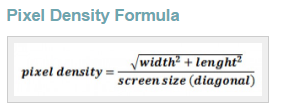

In [14]:
df.drop(["Memory", "Price_euros", "s", "x_res", "y_res"], axis=1, inplace=True)
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Price_rupee,Memory_Size,Memory_Type,PPi
0,Apple,MacBook Pro,Ultrabook,13.3,4096000,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,403045.7365,128,SSD,226.983005
1,Apple,Macbook Air,Ultrabook,13.3,1296000,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,270446.0990,128,Flash,127.677940
2,HP,250 G6,Notebook,15.6,2073600,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,No OS,1.86,172988.7500,256,SSD,141.211998
3,Apple,MacBook Pro,Ultrabook,15.4,5184000,Intel Core i7 2.7GHz,16,AMD Radeon Pro 455,macOS,1.83,763391.8325,512,SSD,220.534624
4,Apple,MacBook Pro,Ultrabook,13.3,4096000,Intel Core i5 3.1GHz,8,Intel Iris Plus Graphics 650,macOS,1.37,542613.0600,256,SSD,226.983005


## 2. Identifying and Removing Outliers

In [15]:
df.describe()

,Inches,ScreenResolution,Ram,Weight,Price_rupee,Memory_Size,PPi
count,1303.000000,1.303000e+03,1303.000000,1303.000000,1.303000e+03,1303.000000,1303.000000
mean,15.017191,2.168807e+06,8.382195,2.038734,3.380612e+05,447.809670,146.635987
std,1.426304,1.391292e+06,5.084665,0.665475,2.102969e+05,366.037159,43.121345
min,10.100000,1.049088e+06,2.000000,0.690000,5.234790e+04,8.000000,90.583402
25%,14.000000,1.440000e+06,4.000000,1.500000,1.802092e+05,256.000000,127.335675
50%,15.600000,2.073600e+06,8.000000,2.040000,2.939305e+05,256.000000,141.211998
75%,15.600000,2.073600e+06,8.000000,2.300000,4.476287e+05,512.000000,157.350512
max,18.400000,8.294400e+06,64.000000,4.700000,1.834884e+06,2048.000000,352.465147


<Axes: title={'center': 'Price_rupee'}>

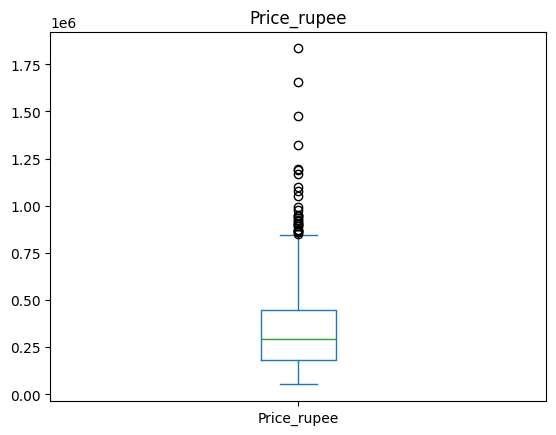

In [16]:
df["Price_rupee"].plot(kind="box", title="Price_rupee")

In [17]:
len(df[df["Price_rupee"]>7.0e5])

83

<Axes: title={'center': 'Price_rupee'}>

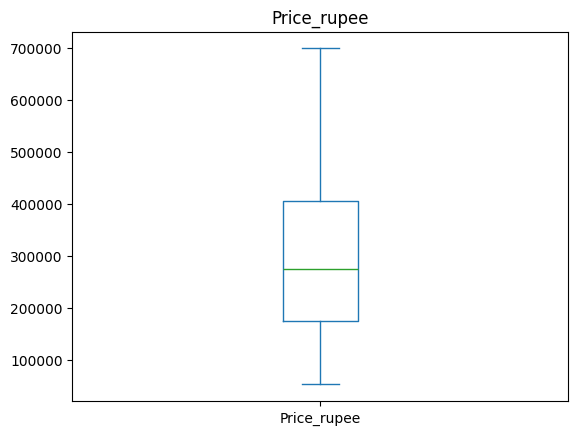

In [18]:
df = df[df["Price_rupee"]<7.0e5].reset_index(drop=True)
df["Price_rupee"].plot(kind="box", title="Price_rupee")

In [19]:
df.shape

(1220, 14)

## 3. Data Trasformation

In [20]:
df.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu',
       'Ram', 'Gpu', 'OpSys', 'Weight', 'Price_rupee', 'Memory_Size',
       'Memory_Type', 'PPi'],
      dtype='object')

In [21]:
# Seprate dependend and independend veriables

x = df.loc[:,['Company', 'Product', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu',
       'Ram', 'Gpu', 'OpSys', 'Weight', 'Memory_Size', 'Memory_Type', 'PPi']]

y = df.loc[:,['Price_rupee',]]

In [22]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
ohe.fit(x[['Company', 'Product', 'TypeName', 'Cpu', 'Gpu', 'OpSys', 'Memory_Type']])

OneHotEncoder()

In [23]:
from sklearn.compose import make_column_transformer
column_trans = make_column_transformer((OneHotEncoder(categories=ohe.categories_), ['Company', 'Product', 'TypeName', 'Cpu',
                                                                            'Gpu', 'OpSys', 'Memory_Type']), remainder="passthrough")

df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Price_rupee,Memory_Size,Memory_Type,PPi
0,Apple,MacBook Pro,Ultrabook,13.3,4096000,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,403045.7365,128,SSD,226.983005
1,Apple,Macbook Air,Ultrabook,13.3,1296000,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,270446.0990,128,Flash,127.677940
2,HP,250 G6,Notebook,15.6,2073600,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,No OS,1.86,172988.7500,256,SSD,141.211998
3,Apple,MacBook Pro,Ultrabook,13.3,4096000,Intel Core i5 3.1GHz,8,Intel Iris Plus Graphics 650,macOS,1.37,542613.0600,256,SSD,226.983005
4,Acer,Aspire 3,Notebook,15.6,1049088,AMD A9-Series 9420 3GHz,4,AMD Radeon R5,Windows 10,2.10,120340.0000,500,HDD,100.454670


# Model Selection

## 1. Decision Tree

In [24]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
model = DecisionTreeRegressor()
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
pipe = make_pipeline(column_trans, model)
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
acc = r2_score(y_test, y_pred)
print("Accuracy: ",acc)

Accuracy:  0.6932153907405411


In [28]:
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    DTR = DecisionTreeRegressor()
    pipe=make_pipeline(column_trans,DTR)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [29]:
np.argmax(scores)

702

In [30]:
scores[np.argmax(scores)]

0.8285524748942718

In [31]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=np.argmax(scores))
DTR = DecisionTreeRegressor()
pipe=make_pipeline(column_trans,DTR)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)

0.8166504627885264

In [32]:
# Save the model for use in future
import pickle
pickle.dump(pipe, open("LaptopPricePrediction_With DTR (copy).pkl", "wb"))

In [33]:
pipe.predict(pd.DataFrame(columns=['Company', 'Product', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu',
                                   'Ram', 'Gpu', 'OpSys', 'Weight', 'Memory_Size', 'Memory_Type', 'PPi'],
                          data=np.array(['Apple','Macbook Air','Ultrabook',13.3, '1296000', 'Intel Core i5 1.8GHz', '8',
                                         'Intel HD Graphics 6000', 'macOS', 1.34, 128, 'Flash', 127.677940]).reshape(1,13)))

array([270446.099])

In [34]:
prediction = pipe.predict(pd.DataFrame(columns=['Company', 'Product', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu',
                                   'Ram', 'Gpu', 'OpSys', 'Weight', 'Memory_Size', 'Memory_Type', 'PPi'],
                          data=np.array(['Apple','Macbook Air','Ultrabook',13.3, '1440900', 'Intel Core i5 1.8GHz', '16',
                                         'Intel HD Graphics 6000', 'macOS', 1.34, 128, 'SSD', 127.677940]).reshape(1,13)))

In [35]:
print(str(np.round(prediction[0],2)))

449770.75


## 2. Random Forest

In [36]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
pipe2 = make_pipeline(column_trans, model)
pipe2.fit(X_train, y_train)
y_pred = pipe2.predict(X_test)
acc = r2_score(y_test, y_pred)
print("Accuracy: ",acc)

C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy:  0.8164368031754115


In [37]:
# Save the model for use in future
import pickle
pickle.dump(pipe2, open("LaptopPricePrediction.pkl", "wb"))

#### <center>Created by: Abdul Mannan</center>